![panda](http://res.freestockphotos.biz/thumbs/3/3173-illustration-of-a-giant-panda-eating-bamboo-th.png)

# Pandas Data Cleaning

# Objectives

- Handle missing data, and recognize when different strategies for handling missing data would be appropriate
- Use DataFrame methods (and sometimes lambda functions) to transform data
- Use string methods to transform object-type columns

In [1]:
# Imports

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

## To The Center!

That's right - we're still working with Austin Animal Center data! But now, let's check out the Outcomes data, instead of the Intakes data we were working with before. It has already been downloaded and is available in this repository in the data folder (`data/Austin_Animal_Center_Outcomes` + date of download `.csv`)

Data source: https://data.austintexas.gov/Health-and-Community-Services/Austin-Animal-Center-Outcomes/9t4d-g238

In [12]:
# Read in the animal center outcomes data as df
# Can use parse_dates and pass a column name to read it as a datetime
df = pd.read_csv("data/Austin_Animal_Center_Outcomes_041122.csv",
                 parse_dates=['DateTime', 'Date of Birth'])

In [13]:
# Check it out
df.head()

,Animal ID,Name,DateTime,MonthYear,Date of Birth,Outcome Type,Outcome Subtype,Animal Type,Sex upon Outcome,Age upon Outcome,Breed,Color
0,A794011,Chunk,2019-05-08 18:20:00,May 2019,2017-05-02,Rto-Adopt,NaN,Cat,Neutered Male,2 years,Domestic Shorthair Mix,Brown Tabby/White
1,A776359,Gizmo,2018-07-18 16:02:00,Jul 2018,2017-07-12,Adoption,NaN,Dog,Neutered Male,1 year,Chihuahua Shorthair Mix,White/Brown
2,A821648,NaN,2020-08-16 11:38:00,Aug 2020,2019-08-16,Euthanasia,NaN,Other,Unknown,1 year,Raccoon,Gray
3,A720371,Moose,2016-02-13 17:59:00,Feb 2016,2015-10-08,Adoption,NaN,Dog,Neutered Male,4 months,Anatol Shepherd/Labrador Retriever,Buff
4,A674754,NaN,2014-03-18 11:47:00,Mar 2014,2014-03-12,Transfer,Partner,Cat,Intact Male,6 days,Domestic Shorthair Mix,Orange Tabby


In [14]:
# Info on the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138282 entries, 0 to 138281
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Animal ID         138282 non-null  object        
 1   Name              97090 non-null   object        
 2   DateTime          138282 non-null  datetime64[ns]
 3   MonthYear         138282 non-null  object        
 4   Date of Birth     138282 non-null  datetime64[ns]
 5   Outcome Type      138259 non-null  object        
 6   Outcome Subtype   63199 non-null   object        
 7   Animal Type       138282 non-null  object        
 8   Sex upon Outcome  138281 non-null  object        
 9   Age upon Outcome  138281 non-null  object        
 10  Breed             138282 non-null  object        
 11  Color             138282 non-null  object        
dtypes: datetime64[ns](2), object(10)
memory usage: 12.7+ MB


## Using Questions to Drive Both Exploration and Cleaning

The best way to think about how to both explore and clean your data set is to think about what is interesting in your data, what questions you have, what you want to know and how to actually get there. We're going to ask a few questions of our dataset, and use that to drive our 'cleaning' process (and talk a little bit about how and when to clean data in the process!)

## Question 1: How old are the animals in our dataset?

Let's try to answer this with the `Age upon Outcome` variable:

In [15]:
# Check out that column
df['Age upon Outcome']

0          2 years
1           1 year
2           1 year
3         4 months
4           6 days
            ...   
138277    2 months
138278      1 year
138279      1 year
138280      1 year
138281      1 year
Name: Age upon Outcome, Length: 138282, dtype: object

Oh no! These aren't numbers! And the data is pretty dirty! Let's see how we can break this column apart, into the Age Number and the Age Unit.

In [25]:
# Split out the age number and age unit - using string methods!
df['Age upon Outcome'][0].split(" ")[0]

'2'

In [36]:
df['Raw Age Number'] = df['Age upon Outcome'].str.split(" ").str[0]

In [37]:
df['Age Units'] = df['Age upon Outcome'].str.split(" ").str[1]

In [38]:
# Sanity check
df.head()

,Animal ID,Name,DateTime,MonthYear,Date of Birth,Outcome Type,Outcome Subtype,Animal Type,Sex upon Outcome,Age upon Outcome,Breed,Color,Raw Age Number,Age Units
0,A794011,Chunk,2019-05-08 18:20:00,May 2019,2017-05-02,Rto-Adopt,NaN,Cat,Neutered Male,2 years,Domestic Shorthair Mix,Brown Tabby/White,2,years
1,A776359,Gizmo,2018-07-18 16:02:00,Jul 2018,2017-07-12,Adoption,NaN,Dog,Neutered Male,1 year,Chihuahua Shorthair Mix,White/Brown,1,year
2,A821648,NaN,2020-08-16 11:38:00,Aug 2020,2019-08-16,Euthanasia,NaN,Other,Unknown,1 year,Raccoon,Gray,1,year
3,A720371,Moose,2016-02-13 17:59:00,Feb 2016,2015-10-08,Adoption,NaN,Dog,Neutered Male,4 months,Anatol Shepherd/Labrador Retriever,Buff,4,months
4,A674754,NaN,2014-03-18 11:47:00,Mar 2014,2014-03-12,Transfer,Partner,Cat,Intact Male,6 days,Domestic Shorthair Mix,Orange Tabby,6,days


In [34]:
# Check the data types really quick...
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138282 entries, 0 to 138281
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Animal ID         138282 non-null  object        
 1   Name              97090 non-null   object        
 2   DateTime          138282 non-null  datetime64[ns]
 3   MonthYear         138282 non-null  object        
 4   Date of Birth     138282 non-null  datetime64[ns]
 5   Outcome Type      138259 non-null  object        
 6   Outcome Subtype   63199 non-null   object        
 7   Animal Type       138282 non-null  object        
 8   Sex upon Outcome  138281 non-null  object        
 9   Age upon Outcome  138281 non-null  object        
 10  Breed             138282 non-null  object        
 11  Color             138282 non-null  object        
 12  Raw Age Number    138281 non-null  object        
 13  Age Units         138281 non-null  object        
dtypes: d

In [35]:
# Need to make our Age Number actual numbers! 
df['Raw Age Number'].astype(int)
# But this throws an error!

ValueError: cannot convert float NaN to integer

Alas! Nulls! Let's check out these null values:

In [49]:
# Check how many nulls we have in our original Age Upon Outcome column
df['Age upon Outcome'].isna()

0         False
1         False
2         False
3         False
4         False
          ...  
138277    False
138278    False
138279    False
138280    False
138281    False
Name: Age upon Outcome, Length: 138282, dtype: bool

In [46]:
df.isna().sum()

Animal ID               0
Name                41192
DateTime                0
MonthYear               0
Date of Birth           0
Outcome Type           23
Outcome Subtype     75083
Animal Type             0
Sex upon Outcome        1
Age upon Outcome        1
Breed                   0
Color                   0
Raw Age Number          1
Age Units               1
dtype: int64

### Handling Missing Data

A lot of the times we'll have missing information in our data set. This can sometimes be troublesome in what we're trying to do.

There are a few strategies we can choose from and they each have their pros/cons:

- **Fill with a Relevant Value**
    - If we know what the nulls 'should' be, easy to fill them with that value
    - For numbers, perhaps the null indicates a 0
    - Or, for string columns, might be easier to handle if we fill with "Missing" or "Unknown"
- **Fill with a Reasonable Value**
    - For numeric data, it might be acceptable to fill with a measure of central tendency (mean or median)
    - For categorical/string data, might be acceptable to fill with the most common (mode)
    - But beware! Filling in missing values can lead to you drawing incorrect conclusions. If most of the data from a column are missing, it's going to appear that the value you filled it in with is more common that it actually was!
- **Specify Missing Data**
    - If you plan to fill in missing values, it might make sense to specify that the data was originally missing by creating a new indicator column
    - This can be helpful when you suspect that the fact the data was missing could be important for an analysis.
- **Drop Missing Data**
    - While you should try to keep as much relevant data as possible, sometimes the other methods don't make as much sense and it's better to remove or **drop** the missing data
    - We typically drop missing data if very little data would be lost and/or trying to fill in the values wouldn't make sense for our use case



So: what should we do about the missing Age upon Outcome data?

- probably fine to drop


Note! There is a Date of Birth column that does not have any nulls! But we're specifically trying to use Age Upon Outcome here because it helps us practice some other tactics for cleaning data.

In [50]:
1 / len(df)

7.231599195846169e-06

In [69]:
# No matter what - better to make this change on a COPY of the dataframe
df_clean = df.copy()

In [70]:
# Code here to handle nulls
df_clean = df_clean.dropna(axis=0, subset=['Age upon Outcome'])

In [71]:
# Sanity check
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 138281 entries, 0 to 138281
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Animal ID         138281 non-null  object        
 1   Name              97090 non-null   object        
 2   DateTime          138281 non-null  datetime64[ns]
 3   MonthYear         138281 non-null  object        
 4   Date of Birth     138281 non-null  datetime64[ns]
 5   Outcome Type      138258 non-null  object        
 6   Outcome Subtype   63198 non-null   object        
 7   Animal Type       138281 non-null  object        
 8   Sex upon Outcome  138280 non-null  object        
 9   Age upon Outcome  138281 non-null  object        
 10  Breed             138281 non-null  object        
 11  Color             138281 non-null  object        
 12  Raw Age Number    138281 non-null  object        
 13  Age Units         138281 non-null  object        
dtypes: d

In [72]:
# Cool - now we can make our Age Number column an integer
df_clean['Raw Age Number'] = df_clean['Raw Age Number'].astype(int)

In [73]:
# Sanity check
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 138281 entries, 0 to 138281
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Animal ID         138281 non-null  object        
 1   Name              97090 non-null   object        
 2   DateTime          138281 non-null  datetime64[ns]
 3   MonthYear         138281 non-null  object        
 4   Date of Birth     138281 non-null  datetime64[ns]
 5   Outcome Type      138258 non-null  object        
 6   Outcome Subtype   63198 non-null   object        
 7   Animal Type       138281 non-null  object        
 8   Sex upon Outcome  138280 non-null  object        
 9   Age upon Outcome  138281 non-null  object        
 10  Breed             138281 non-null  object        
 11  Color             138281 non-null  object        
 12  Raw Age Number    138281 non-null  int64         
 13  Age Units         138281 non-null  object        
dtypes: d

Now let's do something about those Age Values...

### Map, Apply and Applymap

Resource: https://www.geeksforgeeks.org/difference-between-map-applymap-and-apply-methods-in-pandas/

The `.map()` method applies a transformation to every entry in the Series. This transformation  "maps" each value from the Series to a new value. A transformation can be defined by a function, Series, or dictionary.

The `.apply()` method is similar to the `.map()` method for Series, but can only take in functions. 

The `.applymap()` method only works on DataFrames, and applies the same transformation to every element (cell) of that DataFrame.

In [74]:
# Providing this dictionary to capture age values in # days (not perfect)
age_vals = {
    'years': 365,
    'year': 365,
    'months': 30,
    'month': 30,
    'weeks': 7,
    'week': 7,
    'days': 1,
    'day': 1
}

In [75]:
# Now, how can we transform the Age Units column to capture these values?
df_clean['Age Units'] = df_clean['Age Units'].map(age_vals)

In [76]:
df_clean.head()

,Animal ID,Name,DateTime,MonthYear,Date of Birth,Outcome Type,Outcome Subtype,Animal Type,Sex upon Outcome,Age upon Outcome,Breed,Color,Raw Age Number,Age Units
0,A794011,Chunk,2019-05-08 18:20:00,May 2019,2017-05-02,Rto-Adopt,NaN,Cat,Neutered Male,2 years,Domestic Shorthair Mix,Brown Tabby/White,2,365
1,A776359,Gizmo,2018-07-18 16:02:00,Jul 2018,2017-07-12,Adoption,NaN,Dog,Neutered Male,1 year,Chihuahua Shorthair Mix,White/Brown,1,365
2,A821648,NaN,2020-08-16 11:38:00,Aug 2020,2019-08-16,Euthanasia,NaN,Other,Unknown,1 year,Raccoon,Gray,1,365
3,A720371,Moose,2016-02-13 17:59:00,Feb 2016,2015-10-08,Adoption,NaN,Dog,Neutered Male,4 months,Anatol Shepherd/Labrador Retriever,Buff,4,30
4,A674754,NaN,2014-03-18 11:47:00,Mar 2014,2014-03-12,Transfer,Partner,Cat,Intact Male,6 days,Domestic Shorthair Mix,Orange Tabby,6,1


In [77]:
# Sanity check
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 138281 entries, 0 to 138281
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Animal ID         138281 non-null  object        
 1   Name              97090 non-null   object        
 2   DateTime          138281 non-null  datetime64[ns]
 3   MonthYear         138281 non-null  object        
 4   Date of Birth     138281 non-null  datetime64[ns]
 5   Outcome Type      138258 non-null  object        
 6   Outcome Subtype   63198 non-null   object        
 7   Animal Type       138281 non-null  object        
 8   Sex upon Outcome  138280 non-null  object        
 9   Age upon Outcome  138281 non-null  object        
 10  Breed             138281 non-null  object        
 11  Color             138281 non-null  object        
 12  Raw Age Number    138281 non-null  int64         
 13  Age Units         138281 non-null  int64         
dtypes: d

In [78]:
# Now, let's make a new Age in Days column!
df_clean['Age in Days'] = df_clean['Raw Age Number'] * df_clean['Age Units']

In [80]:
# Sanity check
df_clean.head()

,Animal ID,Name,DateTime,MonthYear,Date of Birth,Outcome Type,Outcome Subtype,Animal Type,Sex upon Outcome,Age upon Outcome,Breed,Color,Raw Age Number,Age Units,Age in Days
0,A794011,Chunk,2019-05-08 18:20:00,May 2019,2017-05-02,Rto-Adopt,NaN,Cat,Neutered Male,2 years,Domestic Shorthair Mix,Brown Tabby/White,2,365,730
1,A776359,Gizmo,2018-07-18 16:02:00,Jul 2018,2017-07-12,Adoption,NaN,Dog,Neutered Male,1 year,Chihuahua Shorthair Mix,White/Brown,1,365,365
2,A821648,NaN,2020-08-16 11:38:00,Aug 2020,2019-08-16,Euthanasia,NaN,Other,Unknown,1 year,Raccoon,Gray,1,365,365
3,A720371,Moose,2016-02-13 17:59:00,Feb 2016,2015-10-08,Adoption,NaN,Dog,Neutered Male,4 months,Anatol Shepherd/Labrador Retriever,Buff,4,30,120
4,A674754,NaN,2014-03-18 11:47:00,Mar 2014,2014-03-12,Transfer,Partner,Cat,Intact Male,6 days,Domestic Shorthair Mix,Orange Tabby,6,1,6


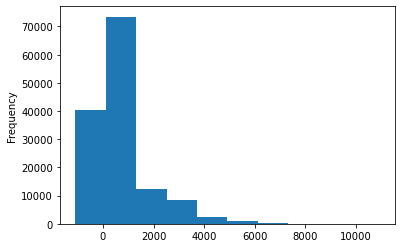

In [82]:
# Now we can visualize!
df_clean['Age in Days'].plot(kind='hist');

In [87]:
# Of course, we could also try...
# Use .dt.normalize on the DateTime column to access the date!
df_clean['Calculated Age in Days'] = df_clean['DateTime'].dt.normalize() - df_clean['Date of Birth']

In [90]:
# Check it
df_clean.head()

,Animal ID,Name,DateTime,MonthYear,Date of Birth,Outcome Type,Outcome Subtype,Animal Type,Sex upon Outcome,Age upon Outcome,Breed,Color,Raw Age Number,Age Units,Age in Days,Calculated Age in Days
0,A794011,Chunk,2019-05-08 18:20:00,May 2019,2017-05-02,Rto-Adopt,NaN,Cat,Neutered Male,2 years,Domestic Shorthair Mix,Brown Tabby/White,2,365,730,736 days
1,A776359,Gizmo,2018-07-18 16:02:00,Jul 2018,2017-07-12,Adoption,NaN,Dog,Neutered Male,1 year,Chihuahua Shorthair Mix,White/Brown,1,365,365,371 days
2,A821648,NaN,2020-08-16 11:38:00,Aug 2020,2019-08-16,Euthanasia,NaN,Other,Unknown,1 year,Raccoon,Gray,1,365,365,366 days
3,A720371,Moose,2016-02-13 17:59:00,Feb 2016,2015-10-08,Adoption,NaN,Dog,Neutered Male,4 months,Anatol Shepherd/Labrador Retriever,Buff,4,30,120,128 days
4,A674754,NaN,2014-03-18 11:47:00,Mar 2014,2014-03-12,Transfer,Partner,Cat,Intact Male,6 days,Domestic Shorthair Mix,Orange Tabby,6,1,6,6 days


## Question 2: Are Most of The Animals Already Fixed?

Let's use `.map()` (or `apply()`) to turn the Sex upon Outcome column into a category with three values: Fixed, Intact, or Unknown. 

In [92]:
# Check out what's currently in that column
df_clean['Sex upon Outcome'].value_counts()

Neutered Male    48720
Spayed Female    43923
Intact Male      17563
Intact Female    17069
Unknown          11005
Name: Sex upon Outcome, dtype: int64

In [93]:
df_clean['Sex upon Outcome'].isna().sum()

1

In [94]:
df_clean['Sex upon Outcome'][0]

'Neutered Male'

In [102]:
# We can write a function for this
def fixed_mapper(status):
    '''
    Takes in the current status of animals and outputs whether they have been fixed
    '''
    if status in ['Neutered Male', 'Spayed Female']:
        return "Fixed"
    elif status in ['Intact Male', 'Intact Female']:
        return "Intact"
    else:
        return "Unknown"

In [105]:
# Now let's use it!
df_clean['Status'] = df_clean['Sex upon Outcome'].map(fixed_mapper)

In [106]:
# We had a null in that column before, did that change?
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 138281 entries, 0 to 138281
Data columns (total 17 columns):
 #   Column                  Non-Null Count   Dtype          
---  ------                  --------------   -----          
 0   Animal ID               138281 non-null  object         
 1   Name                    97090 non-null   object         
 2   DateTime                138281 non-null  datetime64[ns] 
 3   MonthYear               138281 non-null  object         
 4   Date of Birth           138281 non-null  datetime64[ns] 
 5   Outcome Type            138258 non-null  object         
 6   Outcome Subtype         63198 non-null   object         
 7   Animal Type             138281 non-null  object         
 8   Sex upon Outcome        138280 non-null  object         
 9   Age upon Outcome        138281 non-null  object         
 10  Breed                   138281 non-null  object         
 11  Color                   138281 non-null  object         
 12  Raw Age Number  

<AxesSubplot:>

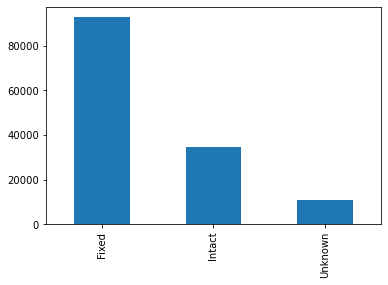

In [111]:
# Visualize it!
df_clean['Status'].value_counts().plot(kind='bar')

## A Quick Aside - for Lambda Functions!

Simple functions can be defined just when you need them, when you would call the function. These are called **lambda functions**. These functions are **anonymous** and disappear immediately after use.

These can often be great as map transformation functions, but they can only do so much.

Let's use them to fill some nulls!

In [112]:
# Check which columns still have null values
df_clean.isna().sum()

Animal ID                     0
Name                      41191
DateTime                      0
MonthYear                     0
Date of Birth                 0
Outcome Type                 23
Outcome Subtype           75083
Animal Type                   0
Sex upon Outcome              1
Age upon Outcome              0
Breed                         0
Color                         0
Raw Age Number                0
Age Units                     0
Age in Days                   0
Calculated Age in Days        0
Status                        0
dtype: int64

Let's look at Outcome Subtype - a lot of nulls, why do we think that is? What would be an appropriate strategy here?

<br>
<details>
    <summary>Possible Answer</summary>

- Might be that the Type doesn't have Subtypes, or that there hasn't been an outcome yet
- Would be appropriate to fill with "N/A"
    
</details>





In [115]:
df_clean['Outcome Subtype']

0             NaN
1             NaN
2             NaN
3             NaN
4         Partner
           ...   
138277        NaN
138278        NaN
138279    Partner
138280        NaN
138281        NaN
Name: Outcome Subtype, Length: 138281, dtype: object

In [116]:
# Let's try it!
# Note: need to use x is np.nan as our if condition
# def replace_null(x):
#     if x is np.nan:
#         return "N/A"

df_clean['Outcome Subtype'] = df_clean['Outcome Subtype'].apply(lambda x: "N/A" if x is np.nan else x)

In [117]:
df_clean.isna().sum()

Animal ID                     0
Name                      41191
DateTime                      0
MonthYear                     0
Date of Birth                 0
Outcome Type                 23
Outcome Subtype               0
Animal Type                   0
Sex upon Outcome              1
Age upon Outcome              0
Breed                         0
Color                         0
Raw Age Number                0
Age Units                     0
Age in Days                   0
Calculated Age in Days        0
Status                        0
dtype: int64

In [118]:
# BUT! Pandas has a function for this
df_clean['Outcome Type'].fillna(value="N/A")

0          Rto-Adopt
1           Adoption
2         Euthanasia
3           Adoption
4           Transfer
             ...    
138277      Adoption
138278      Adoption
138279      Transfer
138280      Adoption
138281      Adoption
Name: Outcome Type, Length: 138281, dtype: object

In [ ]:
# We can use one of these methods to fill the nulls for Outcome Type too
# Explore the column here


In [119]:
# Fill nulls here
df_clean['Outcome Type'] = df_clean['Outcome Type'].fillna(value="N/A")

In [120]:
# Sanity Check
df_clean.isna().sum()

Animal ID                     0
Name                      41191
DateTime                      0
MonthYear                     0
Date of Birth                 0
Outcome Type                  0
Outcome Subtype               0
Animal Type                   0
Sex upon Outcome              1
Age upon Outcome              0
Breed                         0
Color                         0
Raw Age Number                0
Age Units                     0
Age in Days                   0
Calculated Age in Days        0
Status                        0
dtype: int64

### One More Strategy: Build a Missing Indicator

While this doesn't directly answer a question we have, let's go ahead and build a new column to indicate where Name is null (just to demo).

This can be quite useful when modeling, if the data being missing actually means something!

In [123]:
# Quick pandas method for this
df_clean['Name Missing Indicator'] = df_clean['Name'].isna()

In [124]:
df_clean.head()

,Animal ID,Name,DateTime,MonthYear,Date of Birth,Outcome Type,Outcome Subtype,Animal Type,Sex upon Outcome,Age upon Outcome,Breed,Color,Raw Age Number,Age Units,Age in Days,Calculated Age in Days,Status,Name Missing Indicator
0,A794011,Chunk,2019-05-08 18:20:00,May 2019,2017-05-02,Rto-Adopt,N/A,Cat,Neutered Male,2 years,Domestic Shorthair Mix,Brown Tabby/White,2,365,730,736 days,Fixed,False
1,A776359,Gizmo,2018-07-18 16:02:00,Jul 2018,2017-07-12,Adoption,N/A,Dog,Neutered Male,1 year,Chihuahua Shorthair Mix,White/Brown,1,365,365,371 days,Fixed,False
2,A821648,NaN,2020-08-16 11:38:00,Aug 2020,2019-08-16,Euthanasia,N/A,Other,Unknown,1 year,Raccoon,Gray,1,365,365,366 days,Unknown,True
3,A720371,Moose,2016-02-13 17:59:00,Feb 2016,2015-10-08,Adoption,N/A,Dog,Neutered Male,4 months,Anatol Shepherd/Labrador Retriever,Buff,4,30,120,128 days,Fixed,False
4,A674754,NaN,2014-03-18 11:47:00,Mar 2014,2014-03-12,Transfer,Partner,Cat,Intact Male,6 days,Domestic Shorthair Mix,Orange Tabby,6,1,6,6 days,Intact,True


Might be more interesting to build an indicator of where "Mix" is in the Breed column

In [132]:
df_clean['Breed'].unique()

array(['Domestic Shorthair Mix', 'Chihuahua Shorthair Mix', 'Raccoon',
       ..., 'German Shorthair Pointer/Beagle',
       'Pit Bull/German Shorthair Pointer',
       'Labrador Retriever/Neapolitan Mastiff'], dtype=object)

In [146]:
df_clean['Breed'][0].__contains__('Mix')

True

In [149]:
# Let's do it
df_clean['Mixed Breed'] = df_clean['Breed'].str.endswith("Mix")

In [150]:
# Sanity check
df_clean.head()

,Animal ID,Name,DateTime,MonthYear,Date of Birth,Outcome Type,Outcome Subtype,Animal Type,Sex upon Outcome,Age upon Outcome,Breed,Color,Raw Age Number,Age Units,Age in Days,Calculated Age in Days,Status,Name Missing Indicator,Mixed Breed
0,A794011,Chunk,2019-05-08 18:20:00,May 2019,2017-05-02,Rto-Adopt,N/A,Cat,Neutered Male,2 years,Domestic Shorthair Mix,Brown Tabby/White,2,365,730,736 days,Fixed,False,True
1,A776359,Gizmo,2018-07-18 16:02:00,Jul 2018,2017-07-12,Adoption,N/A,Dog,Neutered Male,1 year,Chihuahua Shorthair Mix,White/Brown,1,365,365,371 days,Fixed,False,True
2,A821648,NaN,2020-08-16 11:38:00,Aug 2020,2019-08-16,Euthanasia,N/A,Other,Unknown,1 year,Raccoon,Gray,1,365,365,366 days,Unknown,True,False
3,A720371,Moose,2016-02-13 17:59:00,Feb 2016,2015-10-08,Adoption,N/A,Dog,Neutered Male,4 months,Anatol Shepherd/Labrador Retriever,Buff,4,30,120,128 days,Fixed,False,False
4,A674754,NaN,2014-03-18 11:47:00,Mar 2014,2014-03-12,Transfer,Partner,Cat,Intact Male,6 days,Domestic Shorthair Mix,Orange Tabby,6,1,6,6 days,Intact,True,True


## Comparing Before and After

We can now see all the work we did!

In [151]:
# Original data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138282 entries, 0 to 138281
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Animal ID         138282 non-null  object        
 1   Name              97090 non-null   object        
 2   DateTime          138282 non-null  datetime64[ns]
 3   MonthYear         138282 non-null  object        
 4   Date of Birth     138282 non-null  datetime64[ns]
 5   Outcome Type      138259 non-null  object        
 6   Outcome Subtype   63199 non-null   object        
 7   Animal Type       138282 non-null  object        
 8   Sex upon Outcome  138281 non-null  object        
 9   Age upon Outcome  138281 non-null  object        
 10  Breed             138282 non-null  object        
 11  Color             138282 non-null  object        
 12  Raw Age Number    138281 non-null  object        
 13  Age Units         138281 non-null  object        
dtypes: d

In [152]:
# Missing data cleaned
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 138281 entries, 0 to 138281
Data columns (total 19 columns):
 #   Column                  Non-Null Count   Dtype          
---  ------                  --------------   -----          
 0   Animal ID               138281 non-null  object         
 1   Name                    97090 non-null   object         
 2   DateTime                138281 non-null  datetime64[ns] 
 3   MonthYear               138281 non-null  object         
 4   Date of Birth           138281 non-null  datetime64[ns] 
 5   Outcome Type            138281 non-null  object         
 6   Outcome Subtype         138281 non-null  object         
 7   Animal Type             138281 non-null  object         
 8   Sex upon Outcome        138280 non-null  object         
 9   Age upon Outcome        138281 non-null  object         
 10  Breed                   138281 non-null  object         
 11  Color                   138281 non-null  object         
 12  Raw Age Number  

# Level Up: `.applymap()`

`.applymap()` is used to apply a transformation to each element of a DataFrame.

In [ ]:
# This line will apply the base `type()` function to 
# all entries of the DataFrame.

df.applymap(type).head()

# Level Up: Faster NumPy Methods

In general, `np.where()` and `np.select()` are faster than `map()`. This won't matter too much with reasonably-sized data but can be a consideration for ***big data***.

In [ ]:
# Let's copy the dataframe to play around with
level_up = df_clean.copy()

In [ ]:
level_up.head()

## NumPy's `where()` Method

In [ ]:
# First pass a condition
level_up['Adopted1'] = np.where(level_up['Outcome Type'] == 'Adoption',
                                True,  # What to fill with if the condition is true
                                False)  # What to fill with if not true
level_up.head()

In [ ]:
level_up['Adopted2'] = level_up['Outcome Type'].map(lambda x: True if x == 'Adoption' else False)
level_up.head()

In [ ]:
# Let's time how long it takes np.where() to run by running it multiple times
%timeit np.where(level_up['Outcome Type'] == 'Adoption', True, False)

In [ ]:
# Let's time how long it takes .map() to run by running it multiple times
%timeit level_up['Outcome Type'].map(lambda x: True if x == 'Adoption' else False)

## NumPy's `select()` Method

Again, `numpy` will be faster:

In [ ]:
# Define our list of conditions
conditions = [level_up['Sex upon Outcome'] == 'Neutered Male',
              level_up['Sex upon Outcome'] == 'Spayed Female',
              level_up['Sex upon Outcome'] == 'Intact Male',
              level_up['Sex upon Outcome'] == 'Intact Female',
              level_up['Sex upon Outcome'] == 'Unknown',
              level_up['Sex upon Outcome'].isna()]

# Define a matching list of outcomes
choices = ['Fixed', 'Fixed', 'Intact', 'Intact', 'Unknown', 'Unknown']

In [ ]:
# Use np.select
level_up['Grouped Sex upon Outcome1'] = np.select(conditions, choices)
level_up['Grouped Sex upon Outcome1']

In [ ]:
# Check we got the same results with np.where()
(level_up['Grouped Sex upon Outcome1'] != level_up['Grouped Sex upon Outcome']).sum()

In [ ]:
# Let's time how long it takes .map() to run by running it multiple times
%timeit level_up['Sex upon Outcome'].map(fixed_mapper)

In [ ]:
# Let's time how long it takes np.select() to run by running it multiple times
%timeit np.select(conditions, choices)